# Signal Processing in Actigraphy

## Introduction


### Activity

### Light

### Temprature

### Heart beat rate

## Preparing an example

In [3]:
# data example to work on
import pandas as pd

# read data with latin1 encoding
df = pd.read_csv("data/ds_NAid_df.csv", header=0, sep=',', encoding='latin1')

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'DATE.TIME', 'MS', 'EVENT', 'TEMPERATURE',
       'EXT.TEMPERATURE', 'ORIENTATION', 'PIM', 'PIMn', 'TAT', 'TATn', 'ZCM',
       'ZCMn', 'LIGHT', 'AMB.LIGHT', 'RED.LIGHT', 'GREEN.LIGHT', 'BLUE.LIGHT',
       'IR.LIGHT', 'UVA.LIGHT', 'UVB.LIGHT', 'STATE', 'NAid', 'PIMna',
       'LIGHTna', 'TEMPERATUREna', 'latitude', 'longitude', 'timezone',
       'UTCoffset', 'day_night', 'NAid_HA', 'REDna', 'GREENna', 'BLUEna',
       'date', 'NA_onDay_h', 'weekday'],
      dtype='object')

In [35]:
# Just keep id == D01
D01 = df[df['id'] == 'D01']

In [36]:
D01.shape

(63360, 39)

In [37]:
# Drop the first column
D01 = D01.drop(D01.columns[0], axis=1)

In [38]:
D01['DATE.TIME'].head()
# remove the first row
D01 = D01.iloc[1:]

In [39]:
D01['DATE.TIME'].head()

1    2020-04-26 00:01:00
2    2020-04-26 00:02:00
3    2020-04-26 00:03:00
4    2020-04-26 00:04:00
5    2020-04-26 00:05:00
Name: DATE.TIME, dtype: object

In [40]:
D01['DATE.TIME'] = pd.to_datetime(D01['DATE.TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [41]:
# Extract the date and time
D01['TIME'] = D01['DATE.TIME'].dt.time

In [42]:
# Drop the DATE.TIME, id, Date
D01 = D01.drop(columns=['DATE.TIME', 'id', 'date'])


In [32]:
D01.columns

Index(['MS', 'EVENT', 'TEMPERATURE', 'EXT.TEMPERATURE', 'ORIENTATION', 'PIM',
       'PIMn', 'TAT', 'TATn', 'ZCM', 'ZCMn', 'LIGHT', 'AMB.LIGHT', 'RED.LIGHT',
       'GREEN.LIGHT', 'BLUE.LIGHT', 'IR.LIGHT', 'UVA.LIGHT', 'UVB.LIGHT',
       'STATE', 'NAid', 'PIMna', 'LIGHTna', 'TEMPERATUREna', 'latitude',
       'longitude', 'timezone', 'UTCoffset', 'day_night', 'NAid_HA', 'REDna',
       'GREENna', 'BLUEna', 'date', 'NA_onDay_h', 'weekday', 'TIME'],
      dtype='object')

In [33]:
D01['TIME'].head()

1    00:01:00
2    00:02:00
3    00:03:00
4    00:04:00
5    00:05:00
Name: TIME, dtype: object

In [43]:
# Round up the time to the nearest minute
D01['TIME'] = D01['TIME'].apply(lambda x: x.replace(second=0))

In [ ]:
import pandas as pd

# Ensure the 'TIME' column is in string format
D01['TIME'] = pd.to_datetime(D01['TIME'], format='%H:%M:%S')

# Convert 'TIME' to decimal time
D01['DecimalTime'] = D01['TIME'].dt.hour + D01['TIME'].dt.minute / 60 + D01['TIME'].dt.second / 3600

# Proceed with selecting numeric columns
D01_numeric = D01.select_dtypes(include='number')

# Group by Decimal Time and calculate the mean
D01_grouped = D01_numeric.groupby('DecimalTime').mean()

# Display the result
print(D01_grouped)

              MS  EVENT  TEMPERATURE  EXT.TEMPERATURE  ORIENTATION  \
DecimalTime                                                          
0.016667     0.0    0.0    27.668864        26.721818          0.0   
0.033333     0.0    0.0    27.622727        26.689091          0.0   
0.050000     0.0    0.0    27.616818        26.686364          0.0   
0.066667     0.0    0.0    27.616364        26.666591          0.0   
0.083333     0.0    0.0    27.601364        26.660227          0.0   
...          ...    ...          ...              ...          ...   
23.916667    0.0    0.0    27.661364        26.648864          0.0   
23.933333    0.0    0.0    27.635682        26.643409          0.0   
23.950000    0.0    0.0    27.627955        26.637955          0.0   
23.966667    0.0    0.0    27.622727        26.646364          0.0   
23.983333    0.0    0.0    27.626818        26.638864          0.0   

                     PIM       PIMn         TAT      TATn        ZCM  ...  \
DecimalTime 

In [50]:
import matplotlib.pyplot as plt

# Print column names to verify 
print(D01_grouped.columns) 


Index(['MS', 'EVENT', 'TEMPERATURE', 'EXT.TEMPERATURE', 'ORIENTATION', 'PIM',
       'PIMn', 'TAT', 'TATn', 'ZCM', 'ZCMn', 'LIGHT', 'AMB.LIGHT', 'RED.LIGHT',
       'GREEN.LIGHT', 'BLUE.LIGHT', 'IR.LIGHT', 'UVA.LIGHT', 'UVB.LIGHT',
       'STATE', 'NAid', 'PIMna', 'LIGHTna', 'TEMPERATUREna', 'latitude',
       'longitude', 'UTCoffset', 'NAid_HA', 'REDna', 'GREENna', 'BLUEna',
       'NA_onDay_h', 'weekday'],
      dtype='object')


In [71]:
D01_grouped.head()

,TEMPERATURE,PIM,LIGHT
DecimalTime,,,
0.016667,27.668864,2816.045455,14.408864
0.033333,27.622727,2529.590909,16.115909
0.050000,27.616818,2585.931818,17.046364
0.066667,27.616364,2889.181818,16.963864
0.083333,27.601364,3136.954545,17.232727


In [ ]:
# Scaling the data

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select columns
D01_grouped = D01_grouped[['TEMPERATURE', 'PIM', 'LIGHT']]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform, but keep it as a DataFrame with the original index
D01_grouped_scaled = pd.DataFrame(scaler.fit_transform(D01_grouped), 
                                  columns=D01_grouped.columns, 
                                  index=D01_grouped.index)

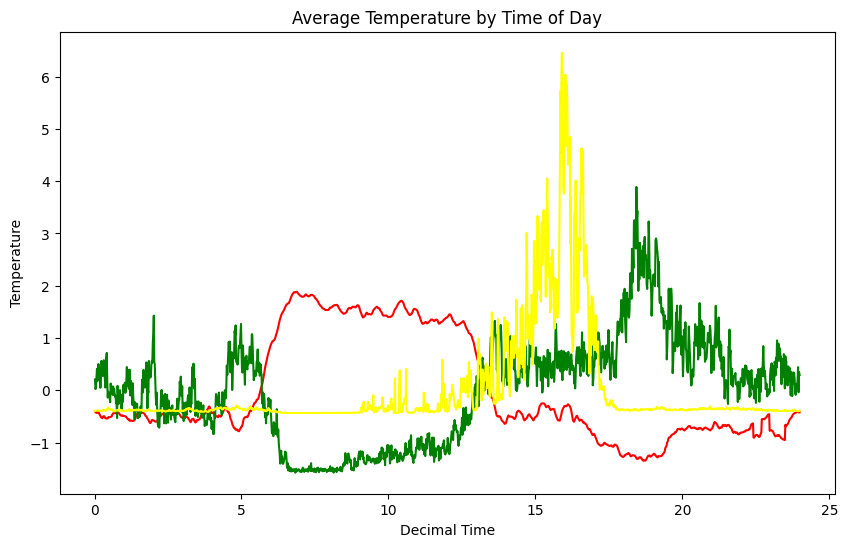

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Plot the data with the correct column name
plt.figure(figsize=(10, 6))
plt.plot(D01_grouped_scaled.index, D01_grouped_scaled['TEMPERATURE'], c = 'red')
plt.plot(D01_grouped_scaled.index, D01_grouped_scaled['PIM'], c = 'green')
plt.plot(D01_grouped_scaled.index, D01_grouped_scaled['LIGHT'], c = 'yellow')
plt.xlabel('Decimal Time')
plt.ylabel('Temperature')
plt.title('Average Temperature by Time of Day')
plt.show()

In [ ]:
# rolling the data to smooth it out window = 10
D01_grouped_scaled_rolled = D01_grouped_scaled.rolling(window=50).mean()

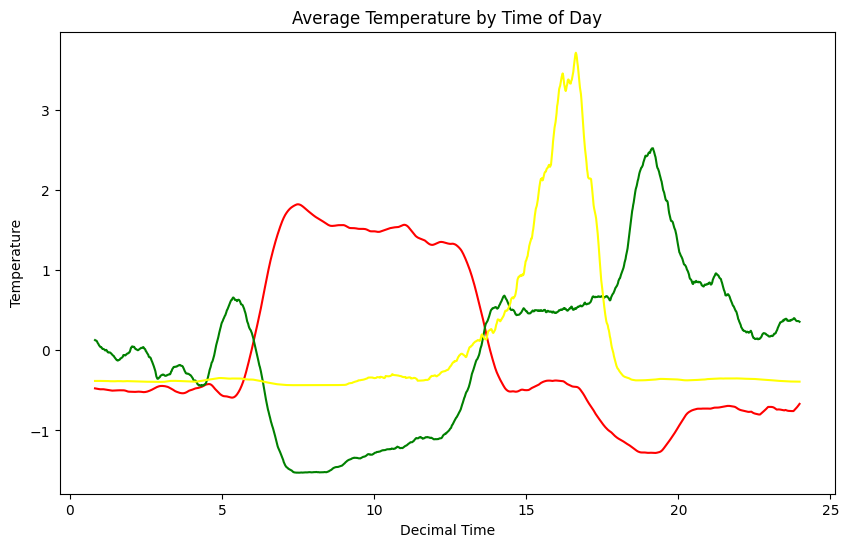

In [82]:

import matplotlib.pyplot as plt
import numpy as np

# Plot the data with the correct column name
plt.figure(figsize=(10, 6))
plt.plot(D01_grouped_scaled_rolled.index, D01_grouped_scaled_rolled['TEMPERATURE'], c = 'red')
plt.plot(D01_grouped_scaled_rolled.index, D01_grouped_scaled_rolled['PIM'], c = 'green')
plt.plot(D01_grouped_scaled_rolled.index, D01_grouped_scaled_rolled['LIGHT'], c = 'yellow')
plt.xlabel('Decimal Time')
plt.ylabel('Temperature')
plt.title('Average Temperature by Time of Day')
plt.show()